In [3]:
import numpy as np
import requests
import pandas as pd
import time

In [4]:
# defining url for pushshift api
url = 'https://api.pushshift.io/reddit/submission/search'

# creating an empty list to collect the dataframe lists
dfs = []

url

# number of loops that will be made each loop pulls a new set posts.

loops = 30 

params = {
    'subreddit': 'Stoicism',
    'size': 100,
}

# defining time in which I start the loop
start_time = time.time()

In [5]:
# create for loop that sets the current time for the sake of ensuring we are not scraping too fast 
# or taking too many of the sites resources 

for i in range(loops):
    
    current_time = time.time()
    #requesting data
    res = requests.get(url, params)    # getting request 
    print(f'rest {i+1} code: ', res.status_code)    # printing request status to ensure it went through securely 
    
    data = res.json()    # using json to read
    posts = data['data']    # indexing into 'data' from json dictionary and list of dictionaries 
    posts_df = pd.DataFrame(posts)
    dfs.append(posts_df)     # create dataframe from 'data' dictionary 
    
    # get oldest post time and use as before parameter in next request 
    params['before'] = posts_df['created_utc'].min()     # adding 'before' parameter to params dictionary 
    
    # created lower limit of 1 second to ensure we are abiding by resource conventions
    time.sleep(3)

# creating a dataframe by concatenating all of the df lists created by the loop 
reddit_posts = pd.concat(dfs)    

rest 1 code:  200
rest 2 code:  200
rest 3 code:  200
rest 4 code:  200
rest 5 code:  200
rest 6 code:  200
rest 7 code:  200
rest 8 code:  200
rest 9 code:  200
rest 10 code:  200
rest 11 code:  200
rest 12 code:  200
rest 13 code:  200
rest 14 code:  200
rest 15 code:  200
rest 16 code:  200
rest 17 code:  200
rest 18 code:  200
rest 19 code:  200
rest 20 code:  200
rest 21 code:  200
rest 22 code:  200
rest 23 code:  200
rest 24 code:  200
rest 25 code:  200
rest 26 code:  200
rest 27 code:  200
rest 28 code:  200
rest 29 code:  200
rest 30 code:  200


In [6]:
reddit_posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 99
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  3000 non-null   object 
 1   allow_live_comments            3000 non-null   bool   
 2   author                         3000 non-null   object 
 3   author_flair_css_class         0 non-null      object 
 4   author_flair_richtext          2965 non-null   object 
 5   author_flair_text              0 non-null      object 
 6   author_flair_type              2965 non-null   object 
 7   author_fullname                2965 non-null   object 
 8   author_patreon_flair           2965 non-null   object 
 9   author_premium                 2965 non-null   object 
 10  awarders                       3000 non-null   object 
 11  can_mod_post                   3000 non-null   bool   
 12  contest_mode                   3000 non-null   boo

In [7]:
reddit_posts.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,media_metadata,author_flair_background_color,author_flair_text_color,poll_data,distinguished,edited,banned_by,author_cakeday,gallery_data,is_gallery
0,[],False,qilaube,None,[],None,text,t2_2ffk7jx9,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Nochickens4u,None,[],None,text,t2_pe0grfk,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,SecretChaosFolder,None,[],None,text,t2_69rtos71,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,neocamel,None,[],None,text,t2_3g3im,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,chillin_mcmillin,None,[],None,text,t2_1heabci3,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
reddit_posts[['title', 'selftext', 'created_utc']]

,title,selftext,created_utc
0,Can an emotional person practice Stoic philoso...,,1609101097
1,I’ve recently been wanting to get into stoicis...,,1609100593
2,If you feeling that you stuck in your practice...,"When I was modern stoic, who just started divi...",1609100019
3,Stoicism and noisy neighbors?,My upstairs neighbors are driving me insane an...,1609099356
4,"Just listened to ""You always hurt the One you ...",https://open.spotify.com/track/42og107RMzQPsQU...,1609096094
...,...,...,...
95,Stoicism and Self-improvement,I have just recently started practicing Stoici...,1601188212
96,Should I go cold turkey on entertainment to pr...,Just started to apply Stoicism In my life and ...,1601187399
97,"Free Law of Attraction, The Secret PDF and Boo...",[removed],1601186546
98,Anxiety,I have trouble rationalising with my anxiety. ...,1601184150


In [9]:
reddit_posts.created_utc.max()

1609101097

In [10]:
reddit_posts.created_utc.min()

1601183261

In [11]:
reddit_posts.iloc[[4]]['title']

4    Just listened to "You always hurt the One you ...
Name: title, dtype: object

In [12]:
pd.to_datetime(reddit_posts['created_utc'], unit='s')

0    2020-12-27 20:31:37
1    2020-12-27 20:23:13
2    2020-12-27 20:13:39
3    2020-12-27 20:02:36
4    2020-12-27 19:08:14
             ...        
95   2020-09-27 06:30:12
96   2020-09-27 06:16:39
97   2020-09-27 06:02:26
98   2020-09-27 05:22:30
99   2020-09-27 05:07:41
Name: created_utc, Length: 3000, dtype: datetime64[ns]

In [13]:
reddit_posts['datetime'] = pd.to_datetime(reddit_posts['created_utc'], unit='s')

In [14]:
reddit_posts[['title', 'selftext', 'datetime']].head()

,title,selftext,datetime
0,Can an emotional person practice Stoic philoso...,,2020-12-27 20:31:37
1,I’ve recently been wanting to get into stoicis...,,2020-12-27 20:23:13
2,If you feeling that you stuck in your practice...,"When I was modern stoic, who just started divi...",2020-12-27 20:13:39
3,Stoicism and noisy neighbors?,My upstairs neighbors are driving me insane an...,2020-12-27 20:02:36
4,"Just listened to ""You always hurt the One you ...",https://open.spotify.com/track/42og107RMzQPsQU...,2020-12-27 19:08:14


In [15]:
reddit_posts['merged'] = reddit_posts['title'] + " " + reddit_posts['selftext']

In [16]:
reddit_posts['title'].map(lambda x: len(x)).max()

304

In [17]:
type(reddit_posts['title'])

pandas.core.series.Series

In [18]:
reddit_posts[reddit_posts['selftext'].isnull()]

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,author_flair_text_color,poll_data,distinguished,edited,banned_by,author_cakeday,gallery_data,is_gallery,datetime,merged
9,[],False,[deleted],None,NaN,None,NaN,NaN,NaN,NaN,...,dark,NaN,NaN,NaN,moderators,NaN,NaN,NaN,2020-12-18 20:05:01,NaN
88,[],False,[deleted],None,NaN,None,NaN,NaN,NaN,NaN,...,dark,NaN,NaN,NaN,moderators,NaN,NaN,NaN,2020-11-15 21:04:04,NaN


In [19]:
# filling null values to run map functions 

reddit_posts['selftext'].fillna('was_null', inplace=True)

In [20]:
# 5 longest posts 

reddit_posts['selftext'].map(lambda x: len(x)).nlargest(10)

63    11944
59    11037
48     7963
72     7959
26     7524
7      7165
46     6781
99     6606
1      6081
77     5982
Name: selftext, dtype: int64

<AxesSubplot:ylabel='Frequency'>

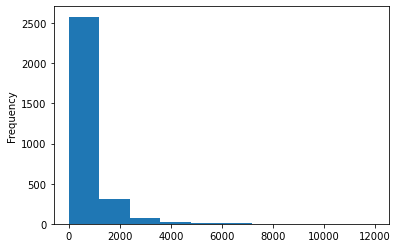

In [21]:
# distribution of post length 

reddit_posts['selftext'].map(lambda x: len(x)).plot(kind='hist')

In [22]:
reddit_posts['selftext'].map(lambda x: len(x)).mean()

565.4673333333334

#### Now scraping for Zen Habits subreddit posts

In [23]:
# defining url for pushshift api
url = 'https://api.pushshift.io/reddit/submission/search'

# creating an empty list to collect the dataframe lists
zen_dfs = []

# number of loops that will be made each loop pulls a new set posts.

loops = 30 

zen_params = {
    'subreddit': 'ZenHabits',
    'size': 100,
}

# defining time in which I start the loop
start_time = time.time()

In [24]:
zen_params

{'subreddit': 'ZenHabits', 'size': 100}

In [25]:
# create for loop that sets the current time for the sake of ensuring we are not scraping too fast 
# or taking too many of the sites resources 

for i in range(loops):
    
    current_time = time.time()
    #requesting data
    res = requests.get(url, zen_params)    # getting request 
    print(f'rest {i+1} code: ', res.status_code)    # printing request status to ensure it went through securely 
    
    data = res.json()    # using json to read
    posts = data['data']    # indexing into 'data' from json dictionary and list of dictionaries 
    zen_posts_df = pd.DataFrame(posts)
    zen_dfs.append(zen_posts_df)     # create dataframe from 'data' dictionary 
    
    # get oldest post time and use as before parameter in next request 
    zen_params['before'] = zen_posts_df['created_utc'].min()     # adding 'before' parameter to params dictionary 
    
    # created lower limit of 1 second to ensure we are abiding by resource conventions
    time.sleep(3)

# creating a dataframe by concatenating all of the df lists created by the loop 
zen_posts = pd.concat(zen_dfs)    

rest 1 code:  200
rest 2 code:  200
rest 3 code:  200
rest 4 code:  200
rest 5 code:  200
rest 6 code:  200
rest 7 code:  200
rest 8 code:  200
rest 9 code:  200
rest 10 code:  200
rest 11 code:  200
rest 12 code:  200
rest 13 code:  200
rest 14 code:  200
rest 15 code:  200
rest 16 code:  200
rest 17 code:  200
rest 18 code:  200
rest 19 code:  200
rest 20 code:  200
rest 21 code:  200
rest 22 code:  200
rest 23 code:  200
rest 24 code:  200
rest 25 code:  200
rest 26 code:  200
rest 27 code:  200
rest 28 code:  200
rest 29 code:  200
rest 30 code:  200


In [26]:
zen_posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 99
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  1638 non-null   object 
 1   allow_live_comments            1433 non-null   object 
 2   author                         2997 non-null   object 
 3   author_flair_css_class         0 non-null      object 
 4   author_flair_richtext          2945 non-null   object 
 5   author_flair_text              0 non-null      object 
 6   author_flair_type              2945 non-null   object 
 7   author_fullname                2129 non-null   object 
 8   author_patreon_flair           2024 non-null   object 
 9   author_premium                 918 non-null    object 
 10  awarders                       1114 non-null   object 
 11  can_mod_post                   2997 non-null   bool   
 12  contest_mode                   2997 non-null   boo

In [27]:
zen_posts.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,media_metadata,steward_reports,updated_utc,og_description,og_title,gilded,rte_mode,author_id,brand_safe,previous_visits
0,[],False,Affectionate_Ranger,None,[],None,text,t2_1c7iyv1j,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Lightfiend,None,[],None,text,t2_39j8l,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Affectionate_Ranger,None,[],None,text,t2_1c7iyv1j,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,BladeV-Cash,None,[],None,text,t2_62adtmzy,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,Affectionate_Ranger,None,[],None,text,t2_1c7iyv1j,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
zen_posts[['title', 'selftext', 'created_utc']]

,title,selftext,created_utc
0,You need to fight your mind every time it trie...,,1609091917
1,A phone call creates stronger bonds than text-...,,1609076848
2,"Everything in your life every experience, ever...",,1609009479
3,The Parable of the Mexican Fisherman got me re...,,1609003356
4,The key to success and productivity isn’t to t...,,1608834104
...,...,...,...
95,Sounds and Musical Instruments for meditation ...,,1520127554
96,The Stoic Inner Citadel,,1520105720
97,THINK,What was your mental reaction to the title wor...,1520104327
98,The Power of Silence - Refreshing your brain,,1520096975


In [29]:
zen_posts['datetime'] = pd.to_datetime(zen_posts['created_utc'], unit='s')

In [30]:
zen_posts[['title', 'selftext', 'datetime']].head()

,title,selftext,datetime
0,You need to fight your mind every time it trie...,,2020-12-27 17:58:37
1,A phone call creates stronger bonds than text-...,,2020-12-27 13:47:28
2,"Everything in your life every experience, ever...",,2020-12-26 19:04:39
3,The Parable of the Mexican Fisherman got me re...,,2020-12-26 17:22:36
4,The key to success and productivity isn’t to t...,,2020-12-24 18:21:44


In [31]:
zen_posts['selftext'].map(lambda x: len(x)).mean()

131.65331998665332

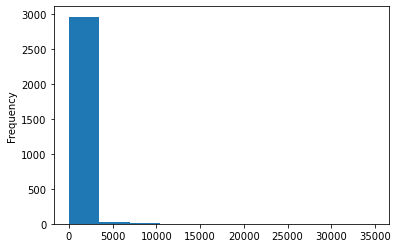

In [32]:
zen_posts['selftext'].map(lambda x: len(x)).plot(kind='hist') ; 

In [33]:
zen_posts['selftext'].map(lambda x: len(x)).nlargest(10)

36    34795
0     15418
27     9955
25     8446
18     7797
95     7449
80     7415
83     7084
67     6748
74     6635
Name: selftext, dtype: int64

### PRACTICE HAM/SPAM! 

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from nltk import FreqDist, pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer